In [ ]:
! pip install tensorboardX pandas simpletransformers transformers

**RESTART RUNTIME**

In [ ]:
! cp ./drive/My\ Drive/mlin/hindicorpus/*.csv ./

# Hindi sentiment analysis task


In [92]:
import pandas as pd
import numpy as np
import re
import string
#import nltk
#nltk.download('punkt')
#import torch
from tensorflow import keras
import seaborn as sns
from keras.callbacks import TensorBoard
%load_ext tensorboard
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,RocCurveDisplay, auc
#from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from simpletransformers.classification import ClassificationModel
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the necessary datasets

## Base datasets - hi_3500.csv

In [ ]:
# Print the dataframe
df_3500 = pd.read_csv("/content/drive/MyDrive/AI Winter Project/hi_3500.csv", header=0, names=['review', 'sentiment'])
df_3500.shape

(9077, 2)

In [ ]:
print(set(df_3500['sentiment'].values))

{'negative', 'positive', 'neutral'}


In [ ]:
labeler = preprocessing.LabelEncoder()

df_3500['sentiment'] = labeler.fit_transform(df_3500['sentiment'] )
df_3500['sentiment'].value_counts()

2    3254
0    3174
1    2649
Name: sentiment, dtype: int64

In [ ]:
#Validation dataset for the movie review
validation_3500 = pd.read_csv("/content/drive/MyDrive/AI Winter Project/train.csv", header=0, names=['review', 'sentiment'])
validation_3500.head()

,review,sentiment
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,2
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,0
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,2
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",0
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,1


In [ ]:
print(set(validation_3500['sentiment'].values))

{0, 1, 2}


In [ ]:
train, test = train_test_split(df_3500, random_state=91)

In [ ]:
print(train.shape)
print(test.shape)

(6807, 2)
(2270, 2)


## IIT Patna Dataset - Movie Review

In [ ]:
iit_df_movie = pd.read_csv("/content/drive/MyDrive/AI Winter Project/iitp-movie-reviews/hi-train.csv", header=0, names=['sentiment','review'])
iit_df_movie.head()

,sentiment,review
0,positive,’उड़ान’ से विक्रमादित्य\nमोटवाने\nने अच्छे सिन...
1,neutral,फिल्म में गानों के दृश्य में अनुष्का को माइक क...
2,neutral,फांसी चढ़ने से पहले वह पाकिस्तान के सदर से खास...
3,positive,राज कुमार हिरानी ने इस मूवी में भी अपने डायरेक...
4,positive,इन फुकरों से आप पहले भी मिल चुके हैं और आपने इ...


In [ ]:
iit_df_movie.shape

(2479, 2)

In [ ]:
print(set(iit_df_movie['sentiment'].values))

{'neutral', 'positive', 'negative'}


In [ ]:
iit_df_movie['sentiment'] = labeler.fit_transform(iit_df_movie['sentiment'] )
iit_df_movie['sentiment'].value_counts()

2    1042
0     741
1     696
Name: sentiment, dtype: int64

In [ ]:
#Validation dataset for movie iit patna

iit_df_movie_valid = pd.read_csv("/content/drive/MyDrive/AI Winter Project/iitp-movie-reviews/hi-valid.csv", header=0, names=['sentiment','review'])
iit_df_movie_valid.head()

,sentiment,review
0,neutral,निर्माता :\nआदित्य चोपड़ा\n\nनिर्देशक :\nहबीब ...
1,positive,इस कसौटी पर करण काफी हद तक खरे भी उतरे हैं।
2,positive,"छोटे शहर की गालियां, छतें और विहंगम दृश्य मोहक..."
3,positive,मनीष और जिशान का काम भी लोगों को याद रहेगा।
4,positive,"बैनर :\nएसएलबी फिल्म्स, हरि ॐ एंटरटेनमेंट कंपन..."


In [ ]:
iit_df_movie_valid['sentiment'] = labeler.fit_transform(iit_df_movie_valid['sentiment'] )
iit_df_movie_valid['sentiment'].value_counts()

In [ ]:
train_iitm, test_iitm = train_test_split(iit_df_movie, random_state=91)

In [ ]:
train_iitm = train_iitm[['review','sentiment']]
test_iitm = test_iitm[['review','sentiment']]

In [ ]:
print(train_iitm.shape)
print(test_iitm.shape)

(1859, 2)
(620, 2)


## IIT Patna - Product Review Dataset

In [ ]:
iit_df_product = pd.read_csv("/content/drive/MyDrive/AI Winter Project/iitp-product-reviews/hi-train.csv", header=0, names=['sentiment','review'])
iit_df_product.head()

,sentiment,review
0,neutral,यह एस्पेक्ट रेशो का ईश्यू है और हम आशा करते है...
1,positive,लेकिन इस तरह के एक मॉडल के एक घर कंप्यूटर के ल...
2,positive,गिर वन राष्ट्रीय उद्यान बाघ संरक्षित क्षेत्र ह...
3,neutral,"और हां , इस फिल्म में हर किरदार भारद्वाज को भर..."
4,positive,फोन उपयोग में बेहद ही आसान है और टच रिस्पॉरन्स...


In [ ]:
iit_df_product.shape

(4181, 2)

In [ ]:
print(set(iit_df_product['sentiment'].values))

{'neutral', 'positive', 'negative'}


In [ ]:
iit_df_product['sentiment'] = labeler.fit_transform(iit_df_product['sentiment'] )
iit_df_product['sentiment'].value_counts()

2    1826
1    1789
0     566
Name: sentiment, dtype: int64

In [ ]:
#Validation dataset for product iit patna

iit_df_product_valid = pd.read_csv("/content/drive/MyDrive/AI Winter Project/iitp-product-reviews/hi-valid.csv", header=0, names=['sentiment','review'])
iit_df_product_valid.head()

,sentiment,review
0,neutral,इतना नहीं बल्कि यहां पर कंपनी अपना पहला फाइव स...
1,neutral,"डिजिफलीप प्रो XT811 , 1200 x 800 P और 8 इंच डि..."
2,positive,निकोन डी810 कैमरे की सबसे खास बात ये है कि इसम...
3,positive,"इसमें विंडोज 8 64-बिट ऑपरेटिंग सिस्टम है , लेक..."
4,negative,3जी प्लास्टिक का बना हुआ था जो हाथ से फिसलता था ।


In [ ]:
iit_df_product_valid['sentiment'] = labeler.fit_transform(iit_df_product_valid['sentiment'] )
iit_df_product_valid['sentiment'].value_counts()

1    223
2    222
0     77
Name: sentiment, dtype: int64

In [ ]:
train_iitp, test_iitp = train_test_split(iit_df_product, random_state=91)

In [ ]:
train_iitp = train_iitp[['review','sentiment']]
test_iitp = test_iitp[['review','sentiment']]

# Text Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Winter Project/hi_3500.csv")

# Print the dataframe
df.head()

,text,experience
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [ ]:
# Null check
df.isnull().sum()

text          0
experience    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9077 entries, 0 to 9076
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        9077 non-null   object
 1   experience  9077 non-null   object
dtypes: object(2)
memory usage: 142.0+ KB


In [ ]:
for index,text in enumerate(df['text'][35:200]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 सखी सइयाँ तो खूब कामात है मेहंगाई डायन्न खाई जात है.
Review 2:
 केजरीवालजी को आज कल ये चिन्ता खाए जा रही है की अगर CM न बने तो जो मानहानि केे मुकदमो मे करोड़ो कीpenaltyभरनी है वो कहा से लाऐंगे #JaiHoNeta
Review 3:
 दिल बहुत ही हरामी कामिनी चीज़ होती है अच्छे खासे हस्ते खेलते आदमी को सेंटियापा काएडमिन बना देती है #SadStoriesOfTwitter
Review 4:
 दुनिया में यह बहुत बड़ी समस्या है कि मूर्ख और कट्टरपंथी अपने आप को बहुत बड़ा समझते हैं जबकि समझदार लोग हमेशा अपनी काबलियत पर संदेह करते हैं।
Review 5:
 तो फिर फेंक अाई डी क्यों बनाई है गर्व के साथ अापना नाम लेने में शर्म कैसी क्या सिर्फ गालियां देने के लिये
Review 6:
 जनार्दन द्विवेदी ने की टीम राहुल की बोलती बंद via
Review 7:
 परमपिता परमेश्वर जो मनुष्य के आत्महत्या करता हे उसका जन्म मनुष्य कभी नहीँ बनता परमपिता परमेश्वर के खिलाफ नहीँ जाना चाहिए परम पिता परमेश्वर
Review 8:
 C C शाहरुख़ ने 50 के नजदीक पहुँच के ऐसी बॉडी बना ली और यहाँ साला भरी जवानी में गर्भवती बनके घूम रहे हैं।
Review 9:
 संपत्ति वाला माओवादी पहली बार सुने माओवादियों क

In [ ]:
for index,text in enumerate(df2['cleaned_text'][35:200]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 ['सखी', 'सइयाँ', 'तो', 'खूब', 'कामात', 'है', 'मेहंगाई', 'डायन्न', 'खाई', 'जात', 'है']
Review 2:
 ['केजरीवालजी', 'को', 'आज', 'कल', 'ये', 'चिन्ता', 'खाए', 'जा', 'रही', 'है', 'की', 'अगर', 'न', 'बने', 'तो', 'जो', 'मानहानि', 'केे', 'मुकदमो', 'मे', 'करोड़ो', 'कीभरनी', 'है', 'वो', 'कहा', 'से', 'लाऐंगे']
Review 3:
 ['दिल', 'बहुत', 'ही', 'हरामी', 'कामिनी', 'चीज़', 'होती', 'है', 'अच्छे', 'खासे', 'हस्ते', 'खेलते', 'आदमी', 'को', 'सेंटियापा', 'काएडमिन', 'बना', 'देती', 'है']
Review 4:
 ['दुनिया', 'में', 'यह', 'बहुत', 'बड़ी', 'समस्या', 'है', 'कि', 'मूर्ख', 'और', 'कट्टरपंथी', 'अपने', 'आप', 'को', 'बहुत', 'बड़ा', 'समझते', 'हैं', 'जबकि', 'समझदार', 'लोग', 'हमेशा', 'अपनी', 'काबलियत', 'पर', 'संदेह', 'करते', 'हैं', '।']
Review 5:
 ['तो', 'फिर', 'फेंक', 'अाई', 'डी', 'क्यों', 'बनाई', 'है', 'गर्व', 'के', 'साथ', 'अापना', 'नाम', 'लेने', 'में', 'शर्म', 'कैसी', 'क्या', 'सिर्फ', 'गालियां', 'देने', 'के', 'लिये']
Review 6:
 ['जनार्दन', 'द्विवेदी', 'ने', 'की', 'टीम', 'राहुल', 'की', 'बोलती', 'बंद']
Review 7:


Some of the preprocessings to be accomplished before taking off the stop words, tokenization and BOW are:
  1. Punctuations needed to be taken care of
  2. Slang correction
  3. Remove digits and words having digits

In [ ]:
df2 = df.copy()

## Removing Emjois from the text

In [ ]:
df2['cleaned_text'] = df2['text']

In [ ]:
df2.head()

,text,experience,cleaned_text
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...


In [ ]:
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

df2['cleaned_text'] = df2['text'].apply(remove_emoji)

In [ ]:
df2.tail(10)

,text,experience,cleaned_text
9067,RT @aajtak: कश्मीर में हमारे जवानों से ऐसा सलू...,neutral,RT @aajtak: कश्मीर में हमारे जवानों से ऐसा सलू...
9068,RT @aajtak: #MoJo ऐसे लूट लिया दोस्त को... देख...,neutral,RT @aajtak: #MoJo ऐसे लूट लिया दोस्त को... देख...
9069,RT @aajtak: #MoJo योगी सरकार का 'रेड' अलर्ट......,neutral,RT @aajtak: #MoJo योगी सरकार का 'रेड' अलर्ट......
9070,RT @aajtak: योगी के मंत्रियों के छापे से हड़कं...,neutral,RT @aajtak: योगी के मंत्रियों के छापे से हड़कं...
9071,"RT @aajtak: #Mojo, विराट का इंतजार हुआ खत्म......",neutral,"RT @aajtak: #Mojo, विराट का इंतजार हुआ खत्म......"
9072,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...,neutral,RT @aajtak: #Mojo बजरंग बली का सबसे विशालकाय र...
9073,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...,neutral,RT @aajtak: कहां अचानक स्कूल में पड़ा मंत्री क...
9074,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...,neutral,RT @aajtak: #MoJo सुनिए कुलभूषण की दर्दभरी आपब...
9075,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...,neutral,RT @aajtak: लव जेहाद के नाम पर क्या उत्तर प्रद...
9076,कश्मीर में हमारे जवानों से ऐसा सलूक? वीडियो दे...,neutral,कश्मीर में हमारे जवानों से ऐसा सलूक? वीडियो दे...


## Punctuations

In [ ]:
df2['cleaned_text'].fillna("", inplace = True)

In [ ]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

## Remove digits and words having digits

In [ ]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

## Removing English words from Reviews

In [ ]:
df2['cleaned_text']=df2['cleaned_text'].apply(lambda x: re.sub('[a-zA-Z]','', x))

Some of the EDA techniques to be followed are:
1. Tokenization
2. Stop word removal

## 1. Tokenization

In [ ]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens

df2['cleaned_text'] = df2['cleaned_text'].apply(lambda x: tokenization(x))

In [ ]:
df2.head()

,text,experience,cleaned_text
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative,"[लोग, वतन, तक, खा, जाते, हैं, इसका, इसे, यकीन,..."
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative,"[गुमनाम, है, वतन, पर, मिटने, वाले, लोग, आतन्कव..."
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative,"[ज़ंजीर, बदली, जा, रही, थी, मैं, समझा, था, रिह..."
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative,"[यूपी, में, बड़े, स्तर, पर, दंगे, करवा, सकती, ..."
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative,"[अंग्रेजी, नहीं, आती, है, इसलिए, हिन्दी, ट्विट..."


## 2. Stop words Removal

In [ ]:
stp_wrds = open("/content/drive/MyDrive/AI Winter Project/stopwords_hindi.txt","r")

In [ ]:
stpwrds_txt=stp_wrds.read()
stpwrds_txt=stpwrds_txt.split('\n')

In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें',\
                'आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', \
                'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', \
                'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', \
                'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ',\
                'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', \
                'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', \
                'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', \
                'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', \
                'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', \
                'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', \
                'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', \
                'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']

punctuations = ['\\u','\\n', "।", "/", "`", '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", "!", ",", ":", "^", "|", "]", "=", "%", "&", ".", ")", "(", "#", "*", "", ";", "-", "}", "{", "|"]


In [ ]:
stpwrds_txt = stpwrds_txt + stopwords_hi + punctuations

In [ ]:
df2['cleaned_text'] = df2.apply(lambda row: [word for word in row['cleaned_text'] if word not in stpwrds_txt], axis = 1)

In [ ]:
df2.head()

,text,experience,cleaned_text
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative,"[लोग, वतन, खा, जाते, यकीन, नहींमान, जाएगा, तू,..."
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative,"[गुमनाम, वतन, मिटने, लोग, आतन्कवादियों, मशहूर,..."
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative,"[ज़ंजीर, बदली, समझा, रिहाई, गयी]"
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative,"[यूपी, बड़े, स्तर, दंगे, करवा, सकती, बीजेपी, म..."
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative,"[अंग्रेजी, आती, इसलिए, हिन्दी, ट्विट, ज्यादा, ..."


## Remove new line

In [ ]:
for i in range(len(df2)):
    df2['cleaned_text'][i] = [s.replace("\n", "") for s in df2['cleaned_text'][i]]
    df2['cleaned_text'][i] = [s.replace("।", "") for s in df2['cleaned_text'][i]]
    df2['cleaned_text'][i] = [s.replace("…", "") for s in df2['cleaned_text'][i]]

In [ ]:
df2['cleaned_text'] = df2['cleaned_text'].apply(lambda x: list(filter(lambda y: y != '', x)))

In [ ]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df2['cleaned_text'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'दिल्ली': 429, 'क्या': 393, 'देखिए': 312, 'गई': 309, 'फिल्म': 297, 'अब': 281, 'पुलिस': 271, 'लोगों': 262, 'मोदी': 223, 'गए': 220, 'देश': 219, 'बात': 212, 'बजे': 212, 'सरकार': 199, 'टीम': 194, 'भारत': 173, 'दिन': 172, 'साल': 171, 'होगा': 170, 'काम': 163, 'उन्होंने': 161, 'वो': 160, 'लोग': 157, 'लेकर': 154, 'बार': 154, 'दी': 149, 'कांग्रेस': 148, 'आजतक': 144, 'वीडियो': 138, 'चाहिए': 133, 'समय': 130, 'बीच': 125, 'काफी': 125, 'क्यों': 124, 'दे': 123, 'आ': 120, 'हर': 120, 'मौत': 116, 'देने': 116, 'लाइव': 115, 'नाम': 113, 'दोनों': 112, 'सिंह': 111, 'चुनाव': 109, 'ज्यादा': 108, 'कार्यक्रम': 108, 'हत्या': 107, 'राहुल': 106, 'अगर': 104, 'सवाल': 103, 'बीजेपी': 102, 'जाता': 102, 'इलाके': 102, 'बना': 101, 'बोल': 101, 'हूं': 100, 'लिया': 99, 'सिर्फ': 98, 'कारण': 98, 'पूरी': 98, 'अन्य': 98, 'पास': 95, 'जीत': 95, 'हमारे': 94, 'शुरू': 91, 'पाकिस्तान': 90, 'लगा': 87, 'रिपोर्ट': 87, 'वजह': 85, 'वाली': 85, 'मामले': 84, 'नेता': 82, 'ऐसा': 81, 'नही': 80, 'तीन': 80, 'ले': 79, 'मैच': 79, 'भारतीय': 7

# Function to set us up for training and evaluating the model

In [117]:
#Function to train and predict LLM models

def model_training(mdl, type, train_df, test_df):
  # set use_cuda=False on CPU-only platforms
  mdl = ClassificationModel('roberta', type, num_labels=3, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 5,
    'silent': True
  })
  
  mdl.train_model(train_df)

  # Evaluation df
  eval_frame = test_df

  # Checking for bad predictions
  result, model_outputs, wrong_predictions = mdl.eval_model(eval_frame)
  bads = {}
  for pred in wrong_predictions:
      if pred.label in bads:
          bads[pred.label] += 1
      else:
          bads[pred.label] = 1
  print("wrong predictions")
  print(str(len(wrong_predictions)) + ' wrong out of ' + str(len(eval_frame)))
  print(bads)

  return eval_frame, mdl

In [ ]:
# Evaluating upon models
def evaluate_model(mdl, eval_df):
  # List eval for 
  list_eval = eval_df['review'].to_list()

  # Making predicitons
  predictions, raw_outputs = mdl.predict(list_eval)

  # Evaluating the model output
  targets = eval_df['sentiment'].to_list()
  accuracy = metrics.accuracy_score(targets, predictions)

  return accuracy, targets, predictions

In [113]:
def confusion_mtx(act,pred):
  #compute the confusion matrix.
  cm = confusion_matrix(act,pred)

  #tn, fp, fn, tp = cm.ravel()
  # Calculate sensitivity and specificity
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])

  print("Sensitivity score of the model:", sensitivity)
  print("Specificity score of the model:", specificity)
  print("\n")

  #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g',
              xticklabels=['Positive','Negative'],
              yticklabels=['Positive','Negative'])
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()


In [79]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"): 
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

## mBERT

### For hi_3500.csv dataset

In [ ]:
eval_frame_mbert, mdl_mbert = model_training('mbert', 'bert-base-multilingual-uncased', train, test)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

wrong predictions
467 wrong out of 2270
{2: 222, 0: 196, 1: 49}


In [ ]:
accuracy_mbert, targets_mbert, predictions_mbert = evaluate_model(mdl_mbert, eval_frame_mbert)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_mbert)
print("Classification report for mbert:", metrics.classification_report(targets_mbert, predictions_mbert))
#print("ROC AUC Curve score:",metrics.roc_auc_score(targets_mbert, predictions_mbert))

Accuracy of trianing mbert is: 0.7942731277533039
Classification report for mbert:               precision    recall  f1-score   support

           0       0.77      0.75      0.76       797
           1       0.88      0.93      0.90       661
           2       0.75      0.73      0.74       812

    accuracy                           0.79      2270
   macro avg       0.80      0.80      0.80      2270
weighted avg       0.79      0.79      0.79      2270



In [80]:
# ROC-AUC score
roc_auc_score_multiclass(targets_mbert, predictions_mbert)

{0: 0.8149207695865607, 1: 0.9371425293992097, 2: 0.794370451458574}

Sensitivity score of the model: 0.9509493670886076
Specificity score of the model: 0.9792




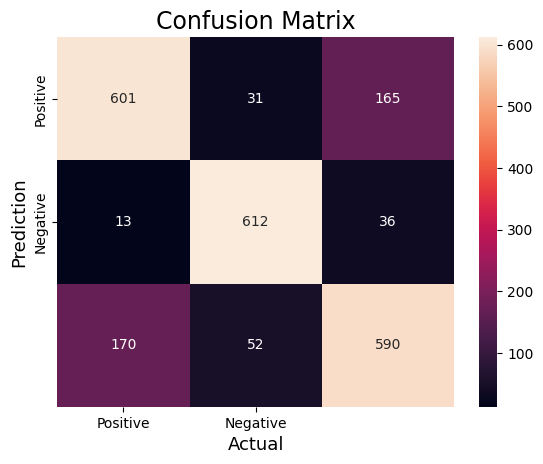

In [114]:
# Confusion matrix
confusion_mtx(targets_mbert, predictions_mbert)

79.5% Accuracy, 3 epochs, mBERT

80.1-80.2% Accuracy, 4 epochs, mBERT; 80.5% @ 5 epochs

### For IITP - Movie dataset

In [ ]:
eval_iitm_mbert, mdl_iitm_mbert = model_training('mbert_iitm', 'bert-base-multilingual-uncased', train_iitm, test_iitm)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

wrong predictions
320 wrong out of 620
{0: 105, 1: 169, 2: 46}


In [ ]:
accuracy_iitm_mbert, targets_iitm_mbert, predictions_iitm_mbert = evaluate_model(mdl_iitm_mbert, eval_iitm_mbert)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitm_mbert)
print("Classification report for mbert:",metrics.classification_report(targets_iitm_mbert, predictions_iitm_mbert))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.4838709677419355
Classification report for mbert:               precision    recall  f1-score   support

           0       0.50      0.45      0.47       191
           1       0.00      0.00      0.00       169
           2       0.48      0.82      0.60       260

    accuracy                           0.48       620
   macro avg       0.33      0.42      0.36       620
weighted avg       0.35      0.48      0.40       620



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### For IITP - Product dataset

In [ ]:
eval_iitp_mbert, mdl_iitp_mbert = model_training('mbert_iitp', 'bert-base-multilingual-uncased', train_iitp, test_iitp)

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

wrong predictions
520 wrong out of 1046
{1: 333, 0: 151, 2: 36}


In [ ]:
accuracy_iitp_mbert, targets_iitp_mbert, predictions_iitp_mbert = evaluate_model(mdl_iitp_mbert, eval_iitp_mbert)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitp_mbert)
print("Classification report for mbert:",metrics.classification_report(targets_iitp_mbert, predictions_iitp_mbert))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.502868068833652
Classification report for mbert:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.72      0.26      0.38       451
           2       0.46      0.92      0.62       444

    accuracy                           0.50      1046
   macro avg       0.39      0.39      0.33      1046
weighted avg       0.51      0.50      0.43      1046



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hindi-TPU-Electra

### For hi_3500.csv dataset

In [81]:
eval_frame_tpu_electra, mdl_tpu_electra = model_training('tpu_electra', 'monsoon-nlp/hindi-tpu-electra', train, test)

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing BertForSequenceClassification: ['electra.encoder.layer.4.intermediate.dense.weight', 'electra.encoder.layer.0.output.LayerNorm.weight', 'electra.encoder.layer.7.output.dense.weight', 'electra.encoder.layer.6.attention.output.dense.bias', 'electra.encoder.layer.2.attention.self.value.weight', 'electra.encoder.layer.3.attention.self.value.weight', 'electra.encoder.layer.5.attention.output.LayerNorm.bias', 'electra.encoder.layer.10.output.dense.bias', 'electra.encoder.layer.1.attention.self.query.bias', 'electra.encoder.layer.4.intermediate.dense.bias', 'electra.encoder.layer.4.attention.self.value.weight', 'electra.encoder.layer.7.attention.self.key.bias', 'electra.encoder.layer.10.attention.self.value.weight', 'electra.encoder.layer.3.attention.self.key.bias', 'electra.embeddings.LayerNorm.bias', 'electra.encoder.layer.6.attention.output.LayerNorm.bias', 'electra.encoder.layer.8.attenti

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'ElectraTokenizer'. 
The class this function is called from is 'BertTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'ElectraTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text 

wrong predictions
492 wrong out of 2270
{0: 212, 2: 221, 1: 59}


In [82]:
accuracy_tpu_electra, targets_tpu_electra, predictions_tpu_electra = evaluate_model(mdl_tpu_electra, eval_frame_tpu_electra)

In [83]:
print("Accuracy of trianing mbert is:", accuracy_tpu_electra)
print("Classification report for mbert:",metrics.classification_report(targets_tpu_electra, predictions_tpu_electra))
#print("ROC AUC Curve score:",metrics.roc_auc_score(targets_mbert, predictions_mbert))

Accuracy of trianing mbert is: 0.7832599118942731
Classification report for mbert:               precision    recall  f1-score   support

           0       0.72      0.73      0.73       797
           1       0.91      0.91      0.91       661
           2       0.74      0.73      0.73       812

    accuracy                           0.78      2270
   macro avg       0.79      0.79      0.79      2270
weighted avg       0.78      0.78      0.78      2270



In [84]:
# ROC-AUC score
roc_auc_score_multiclass(targets_tpu_electra, predictions_tpu_electra)

{0: 0.7913053959135624, 1: 0.936725529336213, 2: 0.7922427307804063}

Sensitivity score of the model: 0.9574468085106383
Specificity score of the model: 0.9435736677115988




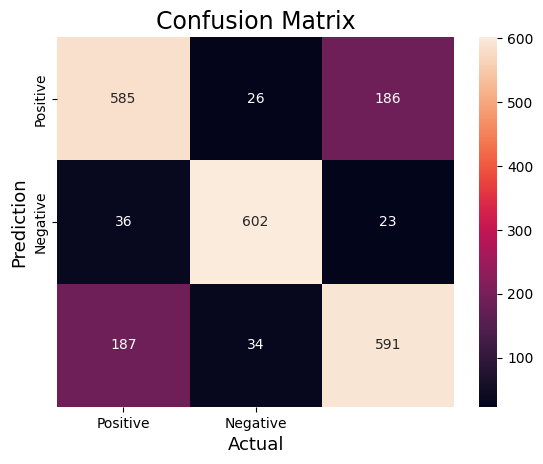

In [115]:
# Confusion matrix
confusion_mtx(targets_tpu_electra, predictions_tpu_electra)

In [ ]:
(1 - (433 / 2270)) * 100

80.9251101321586

79.5% Accuracy, 3 epochs, mBERT

80.1-80.2% Accuracy, 4 epochs, mBERT; 80.5% @ 5 epochs

### For IITP - Movie dataset

In [ ]:
eval_iitm_tpu_electra, mdl_iitm_tpu_electra = model_training('tpu_electra_iitm', 'monsoon-nlp/hindi-tpu-electra', train_iitm, test_iitm)

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing BertForSequenceClassification: ['electra.encoder.layer.0.output.dense.bias', 'electra.encoder.layer.9.output.dense.weight', 'electra.encoder.layer.2.attention.output.dense.weight', 'electra.encoder.layer.2.attention.output.LayerNorm.bias', 'electra.encoder.layer.5.attention.self.value.bias', 'electra.encoder.layer.9.output.LayerNorm.bias', 'electra.encoder.layer.3.attention.output.dense.weight', 'electra.encoder.layer.7.attention.output.dense.weight', 'electra.encoder.layer.11.attention.output.LayerNorm.bias', 'electra.encoder.layer.0.output.dense.weight', 'electra.encoder.layer.4.attention.output.dense.weight', 'electra.encoder.layer.10.intermediate.dense.weight', 'electra.encoder.layer.6.output.LayerNorm.weight', 'electra.encoder.laye

wrong predictions
360 wrong out of 620
{0: 191, 1: 169}


In [ ]:
accuracy_iitm_tpu_electra, targets_iitm_tpu_electra, predictions_iitm_tpu_electra = evaluate_model(mdl_iitm_tpu_electra, eval_iitm_tpu_electra)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitm_tpu_electra)
print("Classification report for mbert:",metrics.classification_report(targets_iitm_tpu_electra, predictions_iitm_tpu_electra))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.41935483870967744
Classification report for mbert:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.00      0.00      0.00       169
           2       0.42      1.00      0.59       260

    accuracy                           0.42       620
   macro avg       0.14      0.33      0.20       620
weighted avg       0.18      0.42      0.25       620



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### For IITP - Product dataset

In [ ]:
eval_iitp_tpu_electra, mdl_iitp_tpu_electra = model_training('tpu_electra_iitp', 'monsoon-nlp/hindi-tpu-electra', train_iitp, test_iitp)

You are using a model of type electra to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing BertForSequenceClassification: ['electra.encoder.layer.0.output.dense.bias', 'electra.encoder.layer.9.output.dense.weight', 'electra.encoder.layer.2.attention.output.dense.weight', 'electra.encoder.layer.2.attention.output.LayerNorm.bias', 'electra.encoder.layer.5.attention.self.value.bias', 'electra.encoder.layer.9.output.LayerNorm.bias', 'electra.encoder.layer.3.attention.output.dense.weight', 'electra.encoder.layer.7.attention.output.dense.weight', 'electra.encoder.layer.11.attention.output.LayerNorm.bias', 'electra.encoder.layer.0.output.dense.weight', 'electra.encoder.layer.4.attention.output.dense.weight', 'electra.encoder.layer.10.intermediate.dense.weight', 'electra.encoder.layer.6.output.LayerNorm.weight', 'electra.encoder.laye

wrong predictions
394 wrong out of 1046
{0: 145, 2: 115, 1: 134}


In [ ]:
accuracy_iitp_tpu_electra, targets_iitp_tpu_electra, predictions_iitp_tpu_electra = evaluate_model(mdl_iitp_tpu_electra, eval_iitp_tpu_electra)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitp_tpu_electra)
print("Classification report for mbert:",metrics.classification_report(targets_iitp_tpu_electra, predictions_iitp_tpu_electra))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.6233269598470363
Classification report for mbert:               precision    recall  f1-score   support

           0       0.12      0.04      0.06       151
           1       0.65      0.70      0.68       451
           2       0.65      0.74      0.69       444

    accuracy                           0.62      1046
   macro avg       0.47      0.49      0.48      1046
weighted avg       0.57      0.62      0.59      1046



78.6-79.9% after 3 epochs at 18.6% complete

75.9-76.0 3 epochs 37.7%; 80.8% at 4 epochs; 81% at 5 epochs

80.8% at 3 epochs @ 47.3% trained, 80.5% at 4 epochs; 82.2% at 5 epochs

tried 61.4% trained, rolled back

## Bench-marking these models against our model

### For hi_3500.csv dataset

In [118]:
eval_frame_roberta, mdl_roberta = model_training('roberta', 'AshiNLP/Hindi-RoBERTa', train, test)

Some weights of the model checkpoint at AshiNLP/Hindi-RoBERTa were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshiNLP/Hindi-RoBERTa and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weig

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


wrong predictions
348 wrong out of 2270
{0: 133, 2: 176, 1: 39}


In [119]:
accuracy_roberta, targets_roberta, predictions_roberta = evaluate_model(mdl_roberta, eval_frame_roberta)

In [120]:
print("Accuracy of trianing mbert is:", accuracy_roberta)
print("Classification report for mbert:",metrics.classification_report(targets_roberta, predictions_roberta))
#print("ROC AUC Curve score:",metrics.roc_auc_score(targets_mbert, predictions_mbert))

Accuracy of trianing mbert is: 0.8466960352422908
Classification report for mbert:               precision    recall  f1-score   support

           0       0.80      0.83      0.82       797
           1       0.93      0.94      0.93       661
           2       0.83      0.78      0.81       812

    accuracy                           0.85      2270
   macro avg       0.85      0.85      0.85      2270
weighted avg       0.85      0.85      0.85      2270



In [121]:
# ROC-AUC score
roc_auc_score_multiclass(targets_roberta, predictions_roberta)

{0: 0.859535631326231, 1: 0.9555831466157177, 2: 0.8463581260516126}

Sensitivity score of the model: 0.967930029154519
Specificity score of the model: 0.971875




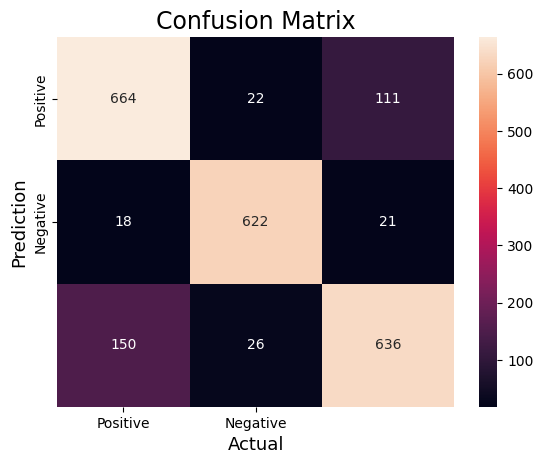

In [122]:
# Confusion matrix
confusion_mtx(targets_roberta, predictions_roberta)

In [ ]:
(1 - (363 / 2270)) * 100

84.00881057268722

### For IITP - Movie dataset

In [ ]:
eval_iitm_roberta, mdl_iitm_roberta = model_training('roberta_iitm', 'AshiNLP/Hindi-RoBERTa', train_iitm, test_iitm)

Some weights of the model checkpoint at AshiNLP/Hindi-RoBERTa were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshiNLP/Hindi-RoBERTa and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weig

wrong predictions
279 wrong out of 620
{0: 101, 2: 89, 1: 89}


In [ ]:
accuracy_iitm_roberta, targets_iitm_roberta, predictions_iitm_roberta = evaluate_model(mdl_iitm_roberta, eval_iitm_roberta)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitm_roberta)
print("Classification report for mbert:",metrics.classification_report(targets_iitm_roberta, predictions_iitm_roberta))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.55
Classification report for mbert:               precision    recall  f1-score   support

           0       0.57      0.47      0.52       191
           1       0.46      0.47      0.47       169
           2       0.59      0.66      0.62       260

    accuracy                           0.55       620
   macro avg       0.54      0.53      0.54       620
weighted avg       0.55      0.55      0.55       620



### For IITP - Product dataset

In [ ]:
eval_iitp_roberta, mdl_iitp_roberta = model_training('roberta_iitp', 'AshiNLP/Hindi-RoBERTa', train_iitp, test_iitp)

Some weights of the model checkpoint at AshiNLP/Hindi-RoBERTa were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshiNLP/Hindi-RoBERTa and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weig

wrong predictions
291 wrong out of 1046
{0: 77, 2: 101, 1: 113}


In [ ]:
accuracy_iitp_roberta, targets_iitp_roberta, predictions_iitp_roberta = evaluate_model(mdl_iitp_roberta, eval_iitp_roberta)

In [ ]:
print("Accuracy of trianing mbert is:", accuracy_iitp_roberta)
print("Classification report for mbert:",metrics.classification_report(targets_iitp_roberta, predictions_iitp_roberta))
#print("ROC AUC Curve score:",metrics.roc_auc_cruve(targets_iitm_mbert, predictions_iitm_mbert))

Accuracy of trianing mbert is: 0.7217973231357553
Classification report for mbert:               precision    recall  f1-score   support

           0       0.65      0.49      0.56       151
           1       0.73      0.75      0.74       451
           2       0.73      0.77      0.75       444

    accuracy                           0.72      1046
   macro avg       0.70      0.67      0.68      1046
weighted avg       0.72      0.72      0.72      1046



## Tokenization check

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="AshiNLP/Hindi-RoBERTa")

Some weights of the model checkpoint at AshiNLP/Hindi-RoBERTa were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshiNLP/Hindi-RoBERTa and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bi

In [ ]:
result = sentiment_analysis('मुझे फिल्म पसंद नहीं आई')
print(result)

[{'label': 'LABEL_1', 'score': 0.5405981540679932}]


In [ ]:
sentiment_analysis2 = pipeline("sentiment-analysis", model="monsoon-nlp/hindi-tpu-electra")

Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/hindi-tpu-electra and are newly initialized: ['classifier.dense.wei

In [ ]:
result = sentiment_analysis2('मुझे फिल्म पसंद नहीं आई')
print(result)

[{'label': 'LABEL_0', 'score': 0.5000351071357727}]


In [ ]:
from transformers import AutoTokenizer
s = 'मुझे फिल्म पसंद है।'
tokenizer = AutoTokenizer.from_pretrained('AshiNLP/Hindi-RoBERTa')
encoded = tokenizer.encode(s)
print(encoded)
tokenizer.decode(encoded)

[0, 295, 298, 459, 266, 371, 273, 285, 270, 295, 910, 275, 302, 288, 361, 2]


'<s>मुझे फिल्म पसंद है।</s>'

In [ ]:
from transformers import AutoTokenizer
s = 'विकिपीडिया सभी विषयों पर प्रामाणिक और उपयोग, परिवर्तन व पुनर्वितरण के लिए स्वतन्त्र ज्ञानकोश बनाने का एक बहुभाषीय प्रकल्प है।'
tokenizer = AutoTokenizer.from_pretrained('monsoon-nlp/hindi-tpu-electra')
encoded = tokenizer.encode(s)
print(encoded)
tokenizer.decode(encoded)

[3, 8798, 2376, 5147, 1912, 11928, 1900, 2380, 16, 3643, 477, 19821, 29329, 1075, 1885, 1948, 7567, 27771, 2971, 1899, 1909, 28969, 1038, 32491, 1886, 507, 4]


'[CLS] विकिपीडिया सभी विषयों पर प्रामाणिक और उपयोग, परिवर्तन व पुनर्वितरण के लिए स्वतन्त्र ज्ञानकोश बनाने का एक बहुभाषीय प्रकल्प है । [SEP]'

## Multi-label Hindi challenge

In [ ]:
import csv

rdr = csv.reader(open("./Constraint_Hindi_Train.csv", 'r'))
headers = None

processed = []

for row in rdr:
  if headers is None:
    headers = row
  else:
    processed.append([ row[1], [
      1 if 'non-hostile' in row[2] else 0,
      1 if 'hate' in row[2] else 0,
      1 if 'offensive' in row[2] else 0,
      1 if 'fake' in row[2] else 0,
      1 if 'defamation' in row[2] else 0,
    ]])
train_df = pd.DataFrame(processed)
train_df.head()

,0,1
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"[0, 1, 1, 0, 0]"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,"[1, 0, 0, 0, 0]"
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...","[1, 0, 0, 0, 0]"
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"[0, 0, 1, 0, 1]"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,"[1, 0, 0, 0, 0]"


In [ ]:
from simpletransformers.classification import MultiLabelClassificationModel

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
model = MultiLabelClassificationModel(
    'electra',
    'monsoon-nlp/hindi-tpu-electra',
    num_labels=5,
    args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 1}
)
model.train_model(train_df)

Some weights of the model checkpoint at monsoon-nlp/hindi-tpu-electra were not used when initializing ElectraForMultiLabelSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ElectraForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForMultiLabelSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/hindi-tpu-electra and are n

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f1330390ef0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f1311d0fa90>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(716, 0.4983071446127399)

In [ ]:
rdr = csv.reader(open("./Constraint_Hindi_Valid.csv", 'r'))
headers = None

validp = []
txts = []

for row in rdr:
  if headers is None:
    headers = row
  else:
    txts.append(row[1])
    validp.append([ row[1], [
      1 if 'non-hostile' in row[2] else 0,
      1 if 'hate' in row[2] else 0,
      1 if 'offensive' in row[2] else 0,
      1 if 'fake' in row[2] else 0,
      1 if 'defamation' in row[2] else 0,
    ]])
valid_df = pd.DataFrame(validp)
valid_df.head()

,0,1
0,दृढ़ इच्छा शक्ति से परिपूर्ण प्रणबदा के लिए दे...,"[1, 0, 0, 0, 0]"
1,भारतीय जनता पार्टी rss वाले इतने गिरे हुए हैं ...,"[0, 0, 0, 0, 1]"
2,कोरोना से निपटने की तैयारी / दिल्ली में 10 हजा...,"[1, 0, 0, 0, 0]"
3,गवर्नर कॉन्फ्रेंस में PM मोदी बोले- शिक्षा नीत...,"[1, 0, 0, 0, 0]"
4,"यूपी: गाजीपुर में Toilet घोटाला, प्रधान व सचिव...","[1, 0, 0, 0, 0]"


In [ ]:
labels, raws = model.predict(txts, multi_label=True)

index = 0
matches = 0
for row in validp:
  if row[1] == labels[index]:
    matches += 1
  # else:
  #   print("no match")
  #   print(row[1])
  #   print(labels[index])
  index += 1

In [ ]:
# exact matches 53.6% of the time
# some weird issue using eval_model, had returned 0/0
matches / len(validp)

0.5363748458692972

In [ ]:
result

{'LRAP': 0.7139214275928205, 'eval_loss': 0.455153253002494}